## SQL Challenge

Testing to see if presented data is possibly fake by:

   1.  Creating a histogram to visualize the most common salary ranges for employees.
   
   2.  Creating a bar chart of average sallary by title.
   
Looking at the results:

 * We see that all engineers (assistant to senoir) all make nearly the same on average!!
 * We see that all staff (regular to senoir) all make nearly the same on average!!
 * While the histogram has less people making more at the top the bar graph clearly shows that the numbers do not add up to a normal compay 
 * FInally, the ID we were given is April Foolsday. This concludes that the data we were presented with was a fabricated.

In [1]:
# Import dependencies
import numpy as np
import pandas as pd
import psycopg2
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
%matplotlib inline

# Import private info for postgress connection (username, password, host and port)
code_source_passcode = open('/Users/Richa/Desktop/SQL_private_connect.py') 
sql_private_connect = code_source_passcode.read()


In [2]:
# We could indeed read files direct from csv in DATA folder,however using sqlacheny for practice

# Format for connection is  ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'
engine = create_engine(f'postgresql://{sql_private_connect}')
connection = engine.connect()

In [3]:
engine.table_names()

['titles', 'employees', 'dept_emp', 'departments', 'dept_managers', 'salaries']

## Check columns and related info
Can also look at ERD attached to file

Need to find connected path to get salary frequency for employees and avg salary by title
* employee_df has emp_no and emp_title_id
* salary_df has emp_no and salary 
* titles_df has title_id and title 

In [4]:
# Import employees table, make a dataframe and view
employees_df = pd.read_sql("SELECT * FROM employees", connection)
print(f'Total length of employees_df: {len(employees_df)}')
employees_df.head()

Total length of employees_df: 300024


,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [5]:
# Import salaries table, make a dataframe and view
salaries_df = pd.read_sql("SELECT * FROM salaries", connection)
print(f'Total length of salaries_df: {len(salaries_df)}')
salaries_df.head()\


Total length of salaries_df: 300024


,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [6]:
titles_df = pd.read_sql("SELECT * FROM titles", connection)
print(f'Total length of titles_df: {len(titles_df)}')
titles_df

Total length of titles_df: 7


,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


## Employee salary ranges and frequency
Since employees_df and salaries_df have the same number (aka all of the employees):
<br>
For this chart we only need the salaries_df to plot how many employees have the same salary

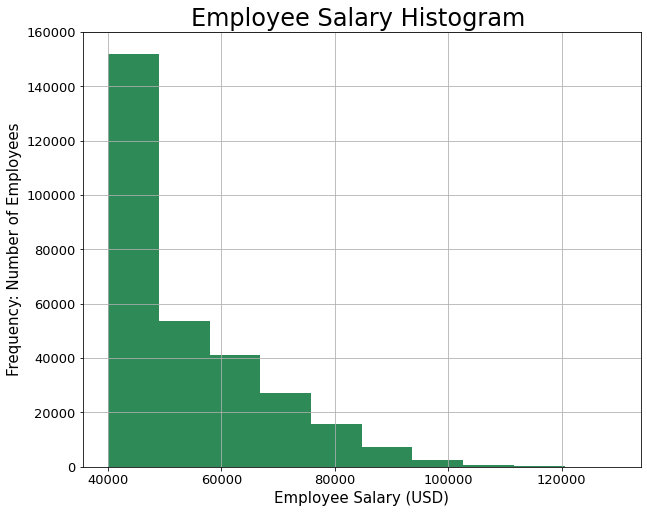

In [7]:
# Histogram
fig=plt.figure(figsize=(10,8))
plt.hist(salaries_df["salary"], color= 'seagreen')

plt.xlabel("Employee Salary (USD)", fontsize=15)
plt.xticks(fontsize= 13)

plt.ylabel("Frequency: Number of Employees",fontsize=15)
plt.yticks(fontsize= 13)
plt.ylim(0, 160_000)

plt.grid()
plt.title("Employee Salary Histogram ", fontsize=24)
plt.show()

In [8]:
# For extra info: to view max and min pay
min_salary = '${:0,.0f}'.format(salaries_df["salary"].min())
max_salary = '${:0,.0f}'.format(salaries_df["salary"].max())

print(f'Minimun sallary is {min_salary}')
print(f'Mamimum sallary is {max_salary}')

Minimun sallary is $40,000
Mamimum sallary is $129,492


## Average salary by position

In [9]:
# Need to join the dataframes to make one with employee number, salary and title
# SQL way: First make a query to join tables and order by title then salary, then id number
query = """
        SELECT e.emp_no, t.title, s.salary
        FROM employees AS e
        LEFT JOIN titles AS t
            ON e.emp_title_id=t.title_id
        LEFT JOIN salaries AS s
            ON e.emp_no=s.emp_no
        ORDER BY title ASC, salary ASC, emp_no ASC
        
        """
# Read query into a dataframe
emp_salary_title_df = pd.read_sql(query,connection)
#emp_salary_title_df = emp_salary_title_df.reset_index()
emp_salary_title_df.head()

,emp_no,title,salary
0,10405,Assistant Engineer,40000
1,10719,Assistant Engineer,40000
2,10755,Assistant Engineer,40000
3,11101,Assistant Engineer,40000
4,11316,Assistant Engineer,40000


In [10]:
# Check row count prom prior employee_df to ensure all employees are still present
print(f'Total length of salary_title_df: {len(emp_salary_title_df)}')
if len(emp_salary_title_df) == len(employees_df):
    print('Well done, the dataframe has all rows')
else:
    print('Try again, You are missing some rows!!')

Total length of salary_title_df: 300024
Well done, the dataframe has all rows


In [11]:
# Look at standard stastical overview for each title
avg_salary_title_df_describe = emp_salary_title_df.groupby('title').agg({'salary':'describe'})
avg_salary_title_df_describe

salary                                                 \
                       count          mean           std      min       25%   
title                                                                         
Assistant Engineer    5835.0  48564.434447  10281.259519  40000.0  40000.00   
Engineer             47303.0  48535.336511  10340.663069  40000.0  40000.00   
Manager                 24.0  51531.041667  12068.128725  40000.0  40000.00   
Senior Engineer      97747.0  48506.799871  10252.482143  40000.0  40000.00   
Senior Staff         26583.0  58550.172704  16473.869221  40000.0  41242.00   
Staff               107384.0  58465.382850  16499.506888  40000.0  41012.75   
Technique Leader     15148.0  48582.896092  10315.342481  40000.0  40000.00   

                                                 
                        50%       75%       max  
title                                            
Assistant Engineer  44588.0  54671.50   99683.0  
Engineer            44478.0  54645.00  100683.0  
Manager             48458.5  60358.75   72446.0  
Senior Engineer     44502.0  54605.00  110449.0  
Senior Staff        56585.0  70632.50  127238.0  
Staff               56407.0  70530.50  129492.0  
Technique Leader    44546.0  54960.25  104065.0

In [12]:
# Need to make salaried into an average in order to graph
avg_salary_title_df = emp_salary_title_df.groupby('title').agg({'salary':'mean'})
avg_salary_title_df = avg_salary_title_df.reset_index()
avg_salary_title_df

,title,salary
0,Assistant Engineer,48564.434447
1,Engineer,48535.336511
2,Manager,51531.041667
3,Senior Engineer,48506.799871
4,Senior Staff,58550.172704
5,Staff,58465.382850
6,Technique Leader,48582.896092


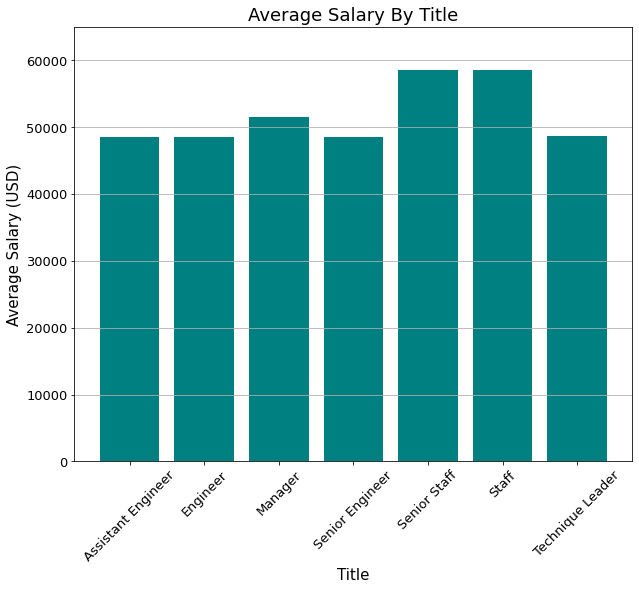

In [13]:
# Plot resluts of average salary by title
x_axis = avg_salary_title_df["title"]
y_axis = avg_salary_title_df["salary"]

fig=plt.figure(figsize=(10,8))
plt.bar(x_axis, y_axis, color ='teal' )

plt.title("Average Salary By Title", fontsize=18)
plt.xlabel("Title", fontsize=15)
plt.xticks(fontsize= 13, rotation= 45)

plt.ylim(0, 65_000)
plt.ylabel("Average Salary (USD)", fontsize=15)
plt.yticks(fontsize= 13)

plt.grid(axis='y')
plt.show()

## Final request 
for project: employer askes us to search our ID number.

You look down at your badge to see that your employee ID number is 499942.

In [14]:
# SQL method of searching
query = '''
        SELECT *
        FROM employees
        WHERE emp_no = 499942

        '''
# Read query into a dataframe
my_employee_badge_df = pd.read_sql(query,connection)

# Display df
my_employee_badge_df

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,499942,e0004,1963-01-10,April,Foolsday,F,1997-02-10
